In [1]:
import os
root_dir = 'Dataset2'
dataset_dir = os.path.join(root_dir)

for root, dirs, files in os.walk(dataset_dir):
   for name in dirs:
      print(os.path.join(root, name))

Dataset2/PCBData
Dataset2/tools
Dataset2/fig
Dataset2/evaluation
Dataset2/PCBData/group44000
Dataset2/PCBData/group12100
Dataset2/PCBData/group92000
Dataset2/PCBData/group90100
Dataset2/PCBData/group20085
Dataset2/PCBData/group00041
Dataset2/PCBData/group50600
Dataset2/PCBData/group12300
Dataset2/PCBData/group13000
Dataset2/PCBData/group12000
Dataset2/PCBData/group77000
Dataset2/PCBData/group44000/44000
Dataset2/PCBData/group44000/44000_not
Dataset2/PCBData/group12100/12100
Dataset2/PCBData/group12100/12100_not
Dataset2/PCBData/group92000/92000
Dataset2/PCBData/group92000/92000_not
Dataset2/PCBData/group90100/90100
Dataset2/PCBData/group90100/90100_not
Dataset2/PCBData/group20085/20085
Dataset2/PCBData/group20085/20085_not
Dataset2/PCBData/group00041/00041
Dataset2/PCBData/group00041/00041_not
Dataset2/PCBData/group50600/50600
Dataset2/PCBData/group50600/50600_not
Dataset2/PCBData/group12300/12300_not
Dataset2/PCBData/group12300/12300
Dataset2/PCBData/group13000/13000_not
Dataset2/PCBD

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
data_dir = 'Dataset2/PCBData'

In [4]:
# Function to get all image paths in a directory
def get_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
                image_paths.append(os.path.join(root, file))
    return image_paths

In [5]:
# Function to load and display sample images
def show_sample_images(image_paths, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_samples, len(image_paths))):
        img = Image.open(image_paths[i])
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
        plt.axis('off')
    plt.show()

In [6]:
# Function to check image dimensions
def get_image_dimensions(image_paths):
    dimensions = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        h, w = img.shape[:2]  # Get height and width
        dimensions.append((w, h))
    return dimensions

In [7]:
# Function to plot the distribution of image dimensions
def plot_image_dimension_distribution(dimensions):
    widths, heights = zip(*dimensions)
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=20, alpha=0.5, label='Width')
    plt.hist(heights, bins=20, alpha=0.5, label='Height')
    plt.title('Distribution of Image Dimensions')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [8]:
# Function to count the number of images per group
def count_images_per_group(data_dir):
    group_counts = {}
    for group in os.listdir(data_dir):
        group_path = os.path.join(data_dir, group)
        if os.path.isdir(group_path):
            image_paths = get_image_paths(group_path)
            group_counts[group] = len(image_paths)
    return group_counts

In [9]:
# Function to plot the class distribution
def plot_class_distribution(group_counts):
    plt.figure(figsize=(10, 5))
    plt.bar(group_counts.keys(), group_counts.values(), color='skyblue')
    plt.title('Image Count per Group')
    plt.xlabel('Group')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)
    plt.show()

Displaying sample images...


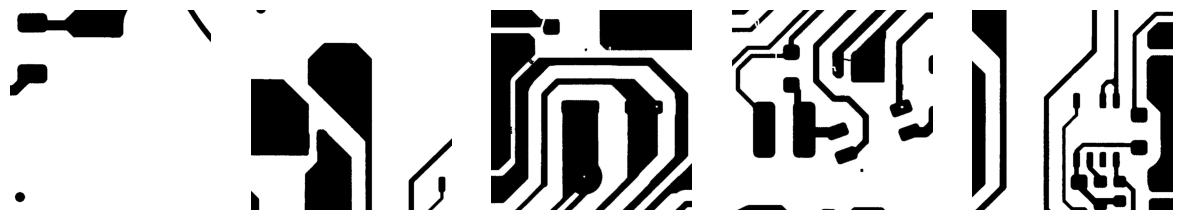

Analyzing image dimensions...


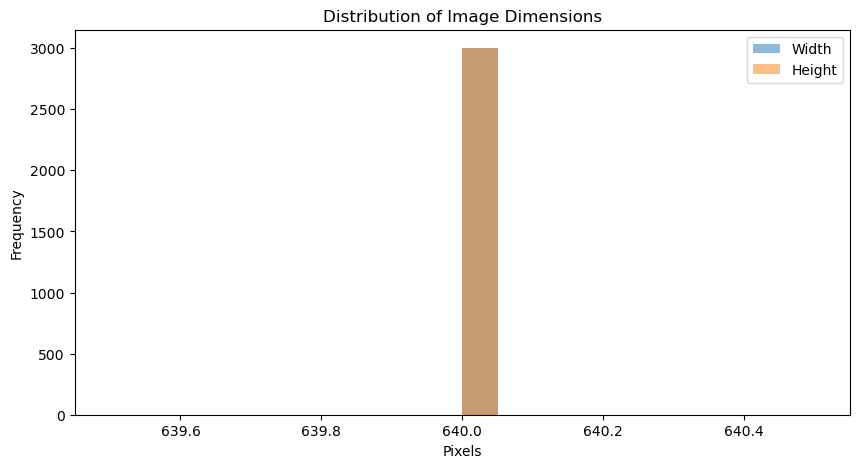

Counting images per group...
{'group44000': 200, 'group12100': 292, 'group92000': 240, 'group90100': 149, 'group20085': 650, 'group00041': 442, 'group50600': 158, 'group12300': 196, 'group13000': 432, 'group12000': 28, 'group77000': 214}


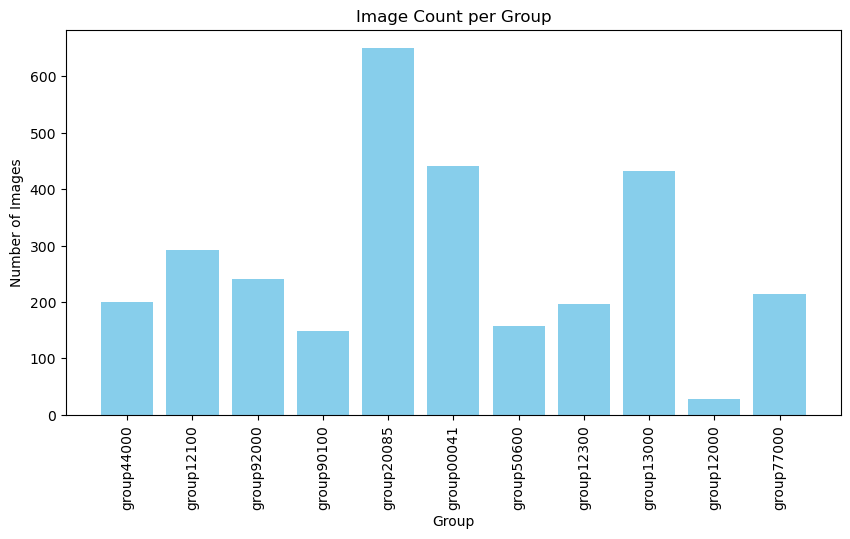

In [10]:
# EDA workflow
if __name__ == "__main__":
    # Get all image paths in the dataset
    image_paths = get_image_paths(data_dir)
    
    # Display sample images
    print("Displaying sample images...")
    show_sample_images(image_paths, num_samples=5)

    # Get and plot image dimensions
    print("Analyzing image dimensions...")
    dimensions = get_image_dimensions(image_paths)
    plot_image_dimension_distribution(dimensions)

    # Count images per group and plot the distribution
    print("Counting images per group...")
    group_counts = count_images_per_group(data_dir)
    print(group_counts)
    plot_class_distribution(group_counts)